In [1]:
# Working through the Applied Geospatial Data Science with Python book
# located at https://github.com/PacktPublishing/Applied-Geospatial-Data-Science-with-Python
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
### Setting up the data_path
data_path = 'Data-pt1\\'

In [3]:
# Read in the US States file from the Census Tiger Files saved as a zip
us_states = gpd.read_file(data_path + 'tl_2021_us_state.zip')
# Filter the US States file to be just California
california = us_states[us_states['NAME']=="California"]
# Show the dataframe
california.head()
# Create a new geopandas dataframe that only includes the CBSAs that are in California using the geopandas mask parameter and passing the previously defined california geopandas dataframe
ca_cbsas = gpd.read_file(data_path + 'tl_2021_us_cbsa.zip', mask=california)
# Show the first 5 records of the ca_cbsas geopandas dataframe
ca_cbsas.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,None,12540,12540,"Bakersfield, CA","Bakersfield, CA Metro Area",M1,1,G3110,21068632654,78405068,+35.3466288,-118.7295064,"POLYGON ((-118.88168 34.81785, -118.88204 34.8..."
1,None,15060,15060,"Brookings, OR","Brookings, OR Micro Area",M2,2,G3110,4217489863,934614482,+42.4664387,-124.2109292,"POLYGON ((-123.82239 42.15933, -123.82246 42.1..."
2,None,17340,17340,"Clearlake, CA","Clearlake, CA Micro Area",M2,2,G3110,3254452700,188748214,+39.0948019,-122.7467569,"POLYGON ((-122.41579 38.76800, -122.41584 38.7..."
3,None,18860,18860,"Crescent City, CA","Crescent City, CA Micro Area",M2,2,G3110,2606118035,578742633,+41.7499033,-123.9809983,"POLYGON ((-124.31611 41.72839, -124.33061 41.7..."
4,456,22280,22280,"Fernley, NV","Fernley, NV Micro Area",M2,2,G3110,5187939862,59489121,+39.0222125,-119.1974246,"POLYGON ((-118.90650 38.51631, -118.90649 38.5..."


In [4]:
# Defining the bounding box
bounding_box = (-123.82239, 42.15933, -123.82246, 38.7)

# Reading in the CA_CBSAs and filtering based on the bounding box
zipped_file = data_path + 'tl_2021_us_cbsa.zip'
cbsas_bbox = gpd.read_file(zipped_file, bbox=bounding_box)

# Showing the first 5 rows of the filtered dataframe
cbsas_bbox.head()

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,None,15060,15060,"Brookings, OR","Brookings, OR Micro Area",M2,2,G3110,4217489863,934614482,+42.4664387,-124.2109292,"POLYGON ((-123.82239 42.15933, -123.82246 42.1..."
1,None,18860,18860,"Crescent City, CA","Crescent City, CA Micro Area",M2,2,G3110,2606118035,578742633,+41.7499033,-123.9809983,"POLYGON ((-124.31611 41.72839, -124.33061 41.7..."
2,None,21700,21700,"Eureka-Arcata, CA","Eureka-Arcata, CA Micro Area",M2,2,G3110,9241565229,1253726036,+40.7066554,-123.9261757,"POLYGON ((-124.36704 40.67227, -124.36080 40.6..."
3,366,24420,24420,"Grants Pass, OR","Grants Pass, OR Metro Area",M1,1,G3110,4244080762,5631773,+42.3869829,-123.5716197,"POLYGON ((-123.23109 42.12807, -123.23108 42.1..."
4,None,46380,46380,"Ukiah, CA","Ukiah, CA Micro Area",M2,2,G3110,9082632466,961740401,+39.4323876,-123.4428811,"POLYGON ((-123.23896 38.80856, -123.24382 38.8..."


In [14]:
# Setting the folder we want to write the output data to
out_path = 'out-data\\'

# Writing out the data asa shape file
ca_cbsas.to_file(out_path + "ca_cbsas.shp")

In [6]:
# Writing ou the data as a GeoJSON
cbsas_bbox.to_file(out_path + "cbsas_bbox.geojson", driver="GeoJSON")

<Axes: >

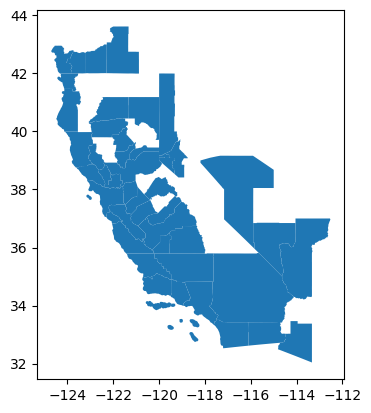

In [7]:
ca_cbsas.plot()

C:\Users\erics\AppData\Local\Temp\ipykernel_95944\3579634733.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

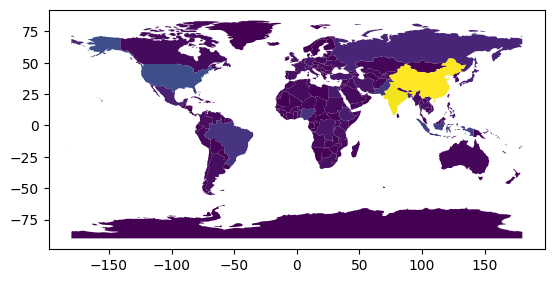

In [8]:
# Chloropleth map of the world's population
# Reading in the natural earth lowres data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the data colored by the pop_est GeoSeries
world.plot(column='pop_est')

<Axes: >

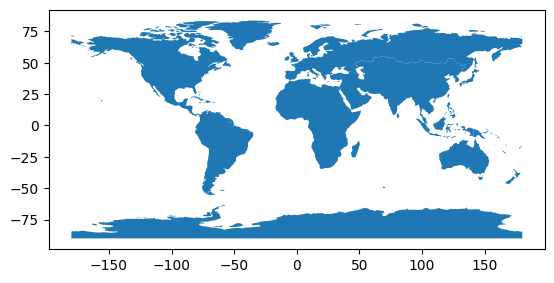

In [12]:
world.head()
continents = world.dissolve(by="continent")
continents.head()
continents.plot()

In [15]:
import pandas as pd
dc_attractions = pd.read_csv(data_path + 'DC_Attractions.csv')
dc_attractions.head()

,Attraction,Address
0,Washington Monument,"2 15th St NW, Washington, DC 20024"
1,Smithsonian National Air and Space Museum,"600 Independence Ave SW, Washington, DC 20560"
2,White House,"1600 Pennsylvania Avenue NW, Washington, DC 20500"
